##### 反向传播的简单例子

In [27]:
import torch

s = torch.tensor([[0.01, 0.02]], requires_grad = True)  #创建一个1*2的tensor（1维向量）
x = torch.ones(2, 2, requires_grad = True)              #创建一个2*2的矩阵型tensor
for i in range(10):
    s = s.mm(x)                                         #反复用s乘以x（矩阵乘法），注意s始终是1*2的tensor
z = torch.mean(s)                                       #对s中的各个元素求均值，得到一个1*1的scalar（标量，即1*1张量）

z.backward()    #在具有很长的依赖路径的计算图上用反向传播算法计算叶节点的梯度
print(x.grad)   #x作为叶节点可以获得这部分梯度信息
print(s.grad)   #s不是叶节点，没有梯度信息

tensor([[37.1200, 37.1200],
        [39.6800, 39.6800]])
None


C:\Users\ncrc190\AppData\Local\Temp\ipykernel_17864\2126337514.py:11: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  print(s.grad)   #s不是叶节点，没有梯度信息


##### 实现简单的线性回归算法

In [28]:
import torch

# 生成数据集
x = torch.linspace(0, 100, 100).type(torch.FloatTensor)     #linspace可以生成0-100之间的均匀的100个数字
rand = torch.randn(100) * 10                                #随机生成100个满足标准正态分布的随机数，均值为0，方差为1.将这个数字乘以10，标准方差变为10
y = x + rand                                                #将x和rand相加，得到伪造的标签数据y。所以(x,y)应能近似地落在y=x这条直线上

In [29]:
# 划分训练集和测试集
precent = int(0.8*x.shape[0])
x_train, x_test = x[:precent], x[precent:]
y_train, y_test = y[:precent], y[precent:]

In [33]:
y_train.numpy()

array([-10.814232 ,  -1.9245847,  11.550364 ,   6.5054436,  -5.753346 ,
       -16.614697 ,  -8.338743 , -12.248329 ,   8.563411 ,  11.795787 ,
        14.740477 ,  -1.0544872,  13.3891945,   9.519986 ,  16.84396  ,
        13.007769 ,  11.485708 ,  12.425446 ,  26.861145 ,  17.029943 ,
        28.676123 ,  35.631905 ,  11.401033 ,  35.235924 ,  22.964415 ,
        55.396194 ,  24.084995 ,  21.300922 ,  10.298826 ,  20.55294  ,
        31.10818  ,  33.028435 ,  54.70385  ,  44.66203  ,  42.0833   ,
        33.387695 ,  23.511866 ,  46.237556 ,  31.866638 ,  41.142204 ,
        47.06461  ,  41.838528 ,  38.95145  ,  30.161674 ,  40.991173 ,
        12.273434 ,  53.50004  ,  39.197605 ,  39.023773 ,  56.75328  ,
        34.75028  ,  63.109608 ,  42.795105 ,  51.871418 ,  55.002865 ,
        34.03763  ,  42.469856 ,  51.619843 ,  56.990273 ,  63.228416 ,
        60.544224 ,  63.65974  ,  64.85777  ,  39.912315 ,  64.269455 ,
        69.4781   ,  74.24246  ,  61.20483  ,  89.30556  ,  51.7

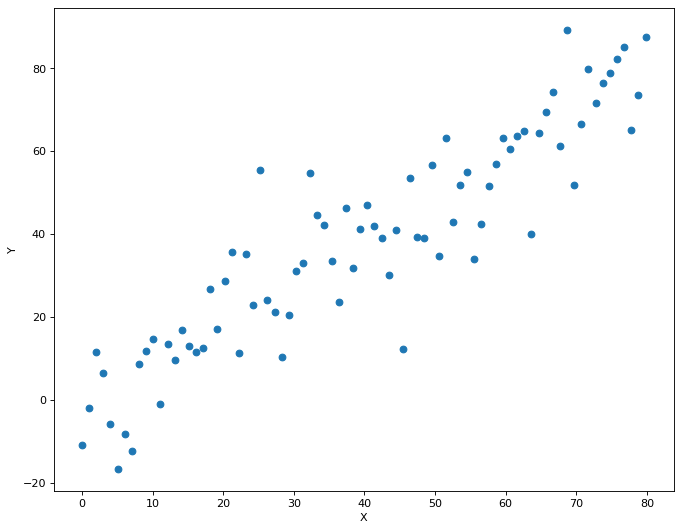

In [39]:
# 绘制数据图
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8), dpi=80)
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [49]:
# 设置超参
a = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)
learning_rate = 1e-5

# 进行训练
for i in range(1000):
    # 构造线性回归模型
    y_pre = a.expand_as(x_train)*x_train + b
    # 构造损失函数
    loss = torch.mean((y_pre - y_train)**2)
    loss.backward()
    # 梯度下降，ps：有回传梯度的tensor不能更改，tensor.data可以修改数值
    a.data.add_(-learning_rate*a.grad.data)
    b.data.add_(-learning_rate*b.grad.data)
    # 梯度清零
    a.grad.data.zero_()
    b.grad.data.zero_()
    # 输出损失
    if int(i%100) == 0:
        print('%d loss is %.2f' % (i, loss))

0 loss is 811.67
100 loss is 115.21
200 loss is 115.10
300 loss is 115.09
400 loss is 115.09
500 loss is 115.09
600 loss is 115.09
700 loss is 115.09
800 loss is 115.09
900 loss is 115.08


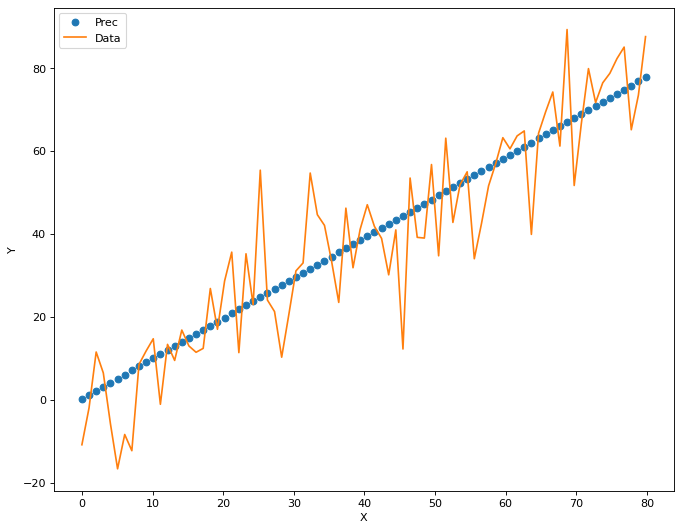

In [64]:
# 绘制拟合函数
plt.figure(figsize=(10, 8), dpi=80)
pic_1, = plt.plot(x_train.numpy(), a.data.numpy()*x_train.numpy() + b.data.numpy(), 'o')
pic_2, = plt.plot(x_train.numpy(), y_train.numpy())
plt.xlabel('X')
plt.ylabel('Y')
plt.legend([pic_1, pic_2], ['Prec', 'Data'])
plt.show()

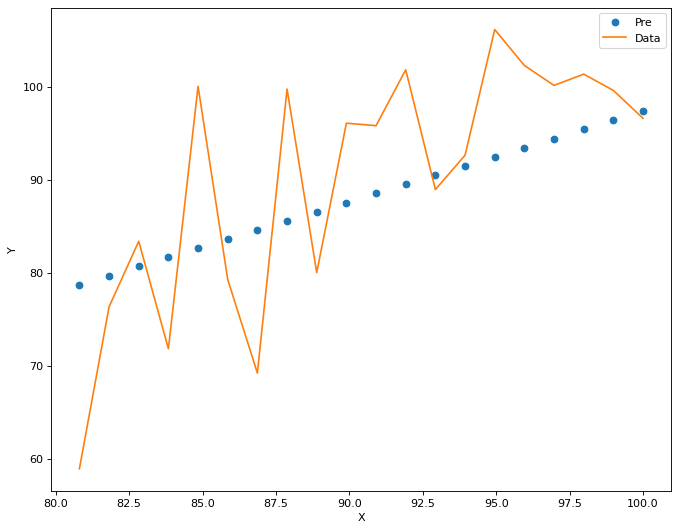

In [68]:
# 进行测试
y_pre = a.expand_as(x_test)*x_test + b.expand_as(x_test)

# 绘制图形
plt.figure(figsize=(10, 8), dpi=80)
pre_1, = plt.plot(x_test.numpy(), y_pre.data.numpy(), 'o')
pre_2, = plt.plot(x_test.numpy(), y_test.numpy())
plt.xlabel('X')
plt.ylabel('Y')
# 设置图例
plt.legend([pre_1, pre_2], ['Pre', 'Data'])
plt.show()